# Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.

It provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
Random Forest grows multiple decision trees which are merged together for a more accurate prediction.

In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [68]:
df = pd.read_csv('Fraud_check.csv')

In [69]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [70]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [71]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [73]:
df.shape

(600, 6)

In [74]:
#finding NA values
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [75]:
#finding the value of each rows

df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [76]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [77]:
df['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [78]:
df['Work.Experience'].value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
27    22
5     22
26    22
19    21
7     21
29    21
6     19
2     19
25    19
16    19
15    18
17    18
24    17
23    16
20    15
1     14
8     14
4     14
3     14
0     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64

In [79]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i, var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = df.columns.tolist()
features.remove('Taxable.Income')
features

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-79-79208ba7f37a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipy

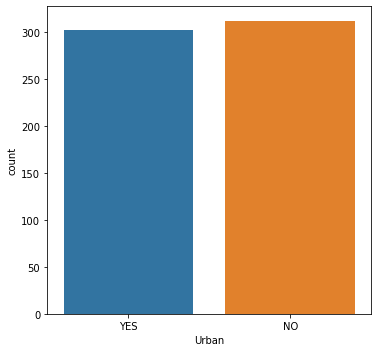

In [80]:
count_plot(df, features)
plt.show()

In [81]:
#ordinal encoder : In ordinal encoding, each unique category value is assigned an integer value.
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df[features])
df_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[  0.,   2.,  84.,  10.,   1.],
       [  1.,   0., 398.,  18.,   1.],
       [  0.,   1., 481.,  30.,   1.],
       ...,
       [  0.,   0., 459.,   0.,   1.],
       [  1.,   1., 533.,  17.,   0.],
       [  0.,   0., 477.,  16.,   0.]])

In [82]:
df_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0
3,1.0,2.0,574.0,15.0,1.0
4,0.0,1.0,4.0,28.0,0.0


In [83]:
df.loc[df["Taxable.Income"]>=30000,"Income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"Income"]="Risky"

In [84]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [85]:
#Label Encoder : LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df['Income'])
df_encoded['Income'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [86]:
df_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0
1,1.0,0.0,398.0,18.0,1.0,0
2,0.0,1.0,481.0,30.0,1.0,0
3,1.0,2.0,574.0,15.0,1.0,0
4,0.0,1.0,4.0,28.0,0.0,0


In [87]:
#feature selection

from sklearn.model_selection import train_test_split

In [88]:
# here X is denoted as metrics and small y denoted as vector
X = df_encoded.iloc[:,:-1]
y = df_encoded['Income']

In [89]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0


In [90]:
y.head(3)

0    0
1    0
2    0
Name: Income, dtype: int32

In [91]:
#Splitting dataset into train & test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (420, 5)
shape of x_test (180, 5)
shape of y_train (420,)
shape of y_test (180,)


In [92]:
X_train.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.033353,0.089697,0.031723,-0.057153
Marital.Status,0.033353,1.000000,0.027385,-0.005067,0.028701
City.Population,0.089697,0.027385,1.000000,0.002756,-0.064580
Work.Experience,0.031723,-0.005067,0.002756,1.000000,-0.075808
Urban,-0.057153,0.028701,-0.064580,-0.075808,1.000000


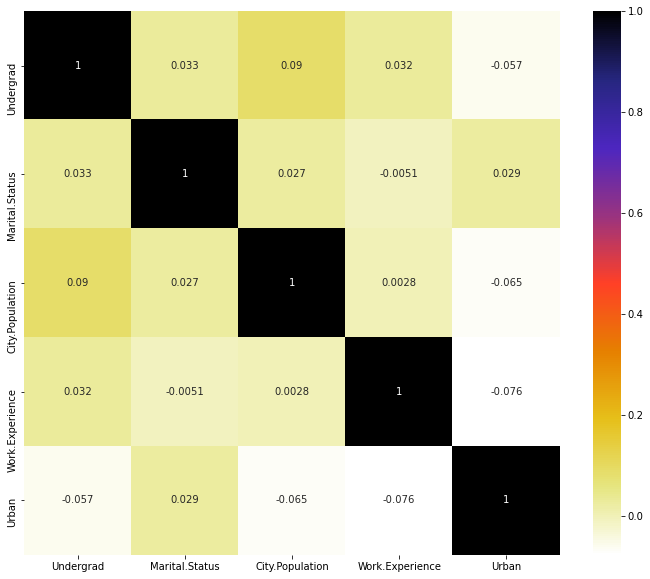

In [93]:
# using pearson correlation,we are doing correlation on X_train dataset. 
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [97]:
def correlation(dataset,threshold):
    col_corr = set() 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: 
                colnames = corr_metrix.columns[i]  # getting the names of columns
                col_corr.add(colnames)
    return col_corr

In [98]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

In [ ]:
#zero correlation

In [ ]:
#model building 
#Random Forest

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_forest = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 40, shuffle = True)
model = RandomForestClassifier(n_estimators = num_forest, max_features = max_features)
result = cross_val_score(model, X, y, cv=kfold)

print(result.mean())

0.7366666666666667


In [112]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [113]:
model.score(X_test, y_test)

0.7222222222222222

In [114]:
#accuracy of train model

model.score(X_train, y_train)

1.0

In [ ]:
#Accuracy of train model 100% and #accuracy of test model 72%

In [115]:
y_predict = model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_predict)

In [117]:
result             #2 dimensional array

array([[130,  10],
       [ 40,   0]], dtype=int64)